In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("sonar2.csv")

print(data.shape)
print(data.dtypes)

print(data.head())
print(data.tail())

print(data.describe())

print(data.value_counts())



(208, 61)
Ang1     float64
Ang2     float64
Ang3     float64
Ang4     float64
Ang5     float64
          ...   
Ang57    float64
Ang58    float64
Ang59    float64
Ang60    float64
Class     object
Length: 61, dtype: object
     Ang1    Ang2    Ang3    Ang4    Ang5    Ang6    Ang7    Ang8    Ang9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

    Ang10  ...   Ang52   Ang53   Ang54   Ang55   Ang56   Ang57   Ang58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.

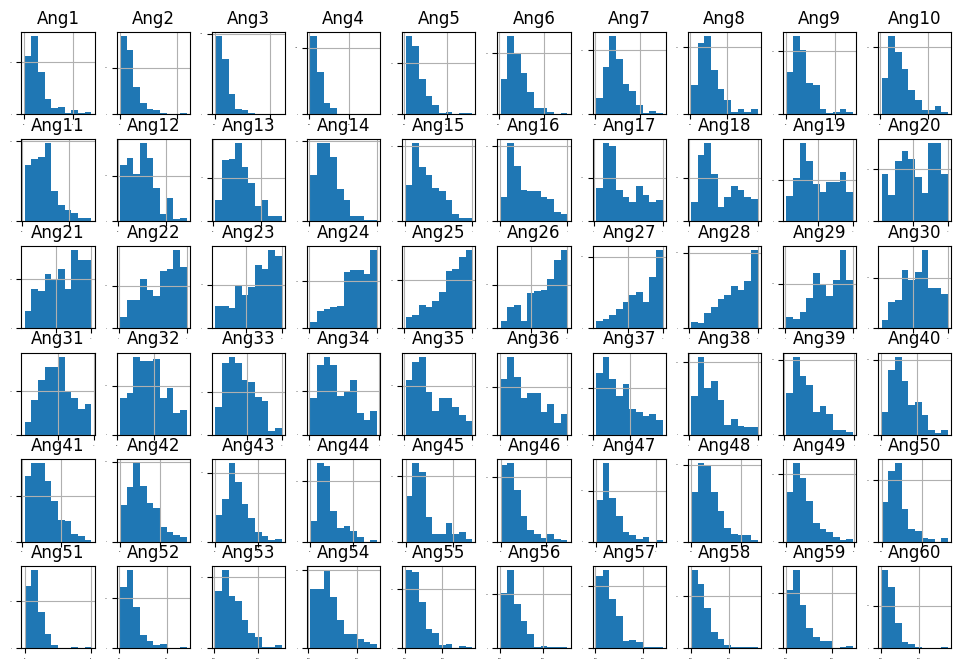

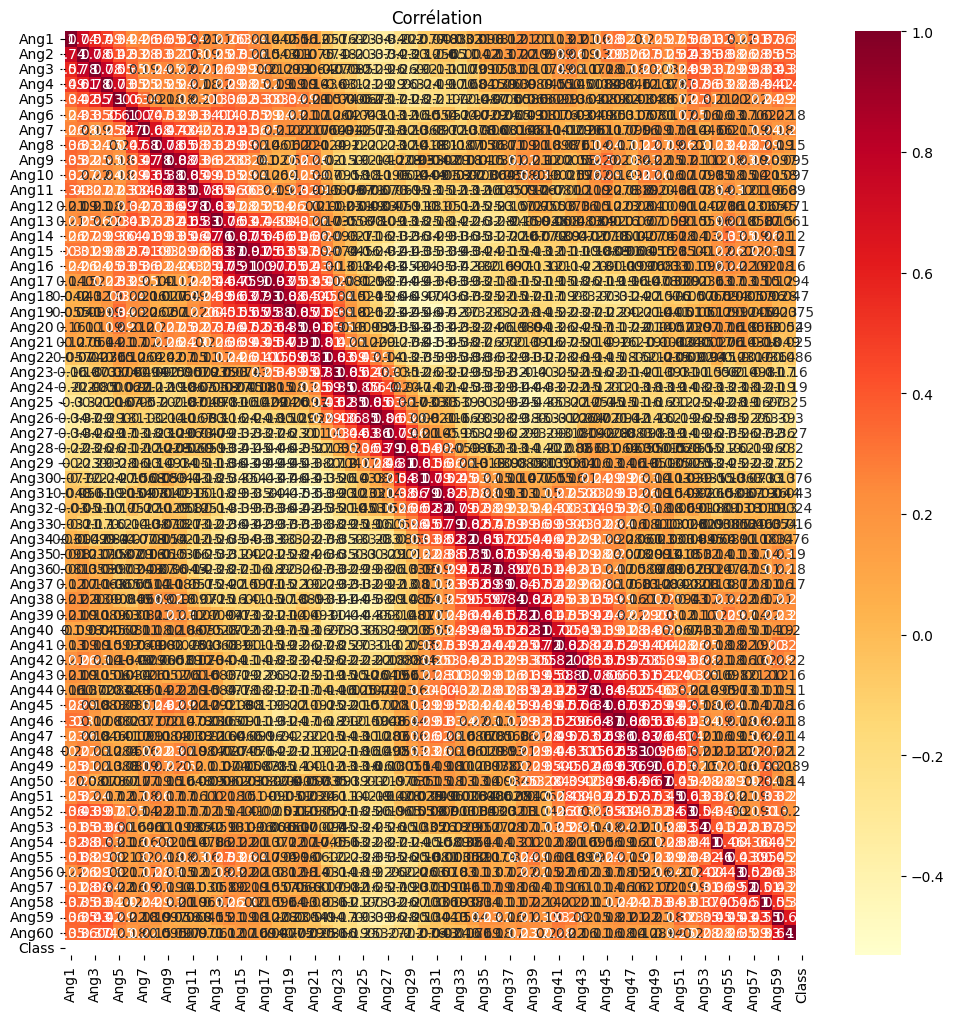

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
data.hist(sharex=False, sharey=False,layout=(6,10),xlabelsize=1,ylabelsize=1,figsize=(12,8))
plt.show()

# Remplacer les valeurs non numériques par NaN dans le DataFrame
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Calculer la matrice de corrélation avec les valeurs numériques uniquement
corr_matrix = data_numeric.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd")
plt.title("Corrélation")
plt.show()


In [46]:
from sklearn.model_selection import train_test_split

# X = data.drop('Class', axis=1)  # Features
# y = data['Class']  # Target variable
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [47]:
from sklearn.model_selection import cross_val_score

def evaluate_model(model):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    return scores.mean()


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Modèle de régression logistique
lr_model = LogisticRegression()
lr_accuracy = evaluate_model(lr_model)
print("Précision du modèle de régression logistique :", lr_accuracy)

# Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy = evaluate_model(knn_model)
print("Précision du modèle KNN :", knn_accuracy)

# Modèle CART
cart_model = DecisionTreeClassifier()
cart_accuracy = evaluate_model(cart_model)
print("Précision du modèle CART :", cart_accuracy)

# Modèle SVM
svm_model = SVC()
svm_accuracy = evaluate_model(svm_model)
print("Précision du modèle SVM :", svm_accuracy)


Précision du modèle de régression logistique : 0.7529411764705882
Précision du modèle KNN : 0.7643382352941176
Précision du modèle CART : 0.6757352941176471
Précision du modèle SVM : 0.7955882352941176


A partir du point 3

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Mode standar

In [50]:
def evaluate_model_scaled(model):
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy')
    return scores.mean()

# Modèle de régression logistique
lr_model = LogisticRegression()
lr_accuracy_scaled = evaluate_model_scaled(lr_model)
print("Précision du modèle de régression logistique (standardisé):", lr_accuracy_scaled)

# Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy_scaled = evaluate_model_scaled(knn_model)
print("Précision du modèle KNN (standardisé):", knn_accuracy_scaled)

# Modèle CART
cart_model = DecisionTreeClassifier()
cart_accuracy_scaled = evaluate_model_scaled(cart_model)
print("Précision du modèle CART (standardisé):", cart_accuracy_scaled)

# Modèle SVM
svm_model = SVC()
svm_accuracy_scaled = evaluate_model_scaled(svm_model)
print("Précision du modèle SVM (standardisé):", svm_accuracy_scaled)


Précision du modèle de régression logistique (standardisé): 0.7525735294117647
Précision du modèle KNN (standardisé): 0.7841911764705882
Précision du modèle CART (standardisé): 0.6753676470588236
Précision du modèle SVM (standardisé): 0.8143382352941175


Point 5

In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, parameters, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Meilleure configuration:", grid_search.best_params_)
print("Meilleure précision:", grid_search.best_score_)


Meilleure configuration: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Meilleure précision: 0.8261029411764707


Point 7

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [42]:
y_pred = rf_model.predict(X_test)


In [43]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle sur le jeu de test :", accuracy)


Précision du modèle sur le jeu de test : 0.8571428571428571


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

y_pred_scaled = svm_model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Précision du modèle SVM sur le jeu de test standardisé :", accuracy_scaled)


Précision du modèle SVM sur le jeu de test standardisé : 0.8571428571428571
